# Cleaning Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Desactivar notación científica en pandas
pd.options.display.float_format = '{:,.0f}'.format

# Desactivar notación científica en numpy
np.set_printoptions(suppress=True)

In [3]:
# Cargar los datos
data = pd.read_csv('bbdd/data.csv', sep=',')


In [4]:
data.head

<bound method NDFrame.head of                                                    url  \
0    https://www.solotodo.cl/products/215742-bmobil...   
1    https://www.solotodo.cl/products/215742-bmobil...   
2    https://www.solotodo.cl/products/183579-motoro...   
3    https://www.solotodo.cl/products/183579-motoro...   
4    https://www.solotodo.cl/products/183579-motoro...   
..                                                 ...   
375  https://www.solotodo.cl/products/252724-samsun...   
376  https://www.solotodo.cl/products/252724-samsun...   
377  https://www.solotodo.cl/products/252729-samsun...   
378  https://www.solotodo.cl/products/252729-samsun...   
379  https://www.solotodo.cl/products/252729-samsun...   

                                                equipo  \
0                              Bmobile C41 (Dark Gray)   
1                              Bmobile C41 (Dark Gray)   
2      Motorola Moto E13 (64 GB / 2 GB / Aurora Green)   
3      Motorola Moto E13 (64 GB / 2 GB / 

In [5]:
# Exploración de variabeles
data = data[data['liberado'] == "sí"]

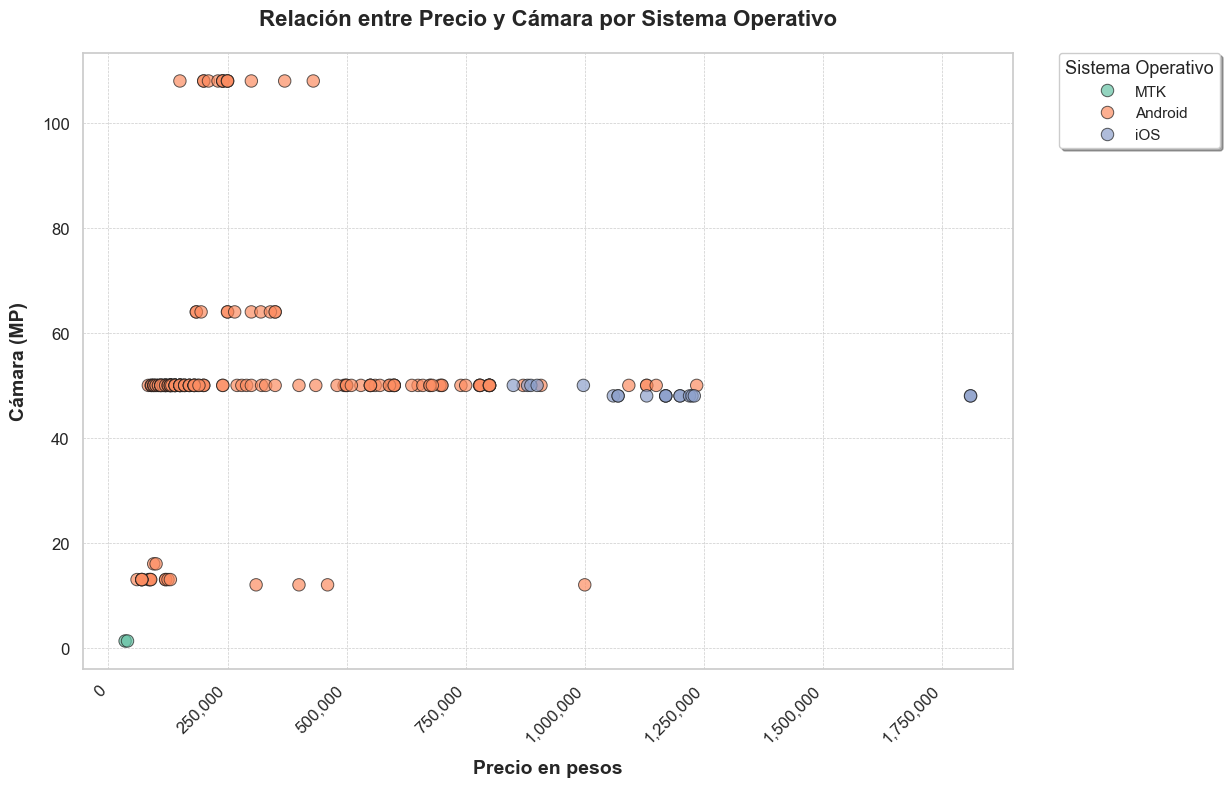

In [6]:
# Establecer estilo y paleta de colores profesional
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x="precio", y="camara", hue="os_categoria", palette="Set2", s=80, edgecolor="k", alpha=0.7)

# Formato del eje X sin notación científica y con separadores de miles
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Configuración de etiquetas y título
plt.xlabel("Precio en pesos", fontsize=14, labelpad=10, weight='bold')
plt.ylabel("Cámara (MP)", fontsize=14, labelpad=10, weight='bold')
plt.title("Relación entre Precio y Cámara por Sistema Operativo", fontsize=16, weight='bold', pad=20)

# Ajuste de la leyenda fuera del gráfico
plt.legend(title="Sistema Operativo", title_fontsize='13', fontsize='11', loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0, frameon=True, shadow=True)

# Rotación y formato de etiquetas del eje X
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir fondo blanco y bordes en el gráfico
plt.gca().set_facecolor("white")
plt.grid(visible=True, linestyle="--", linewidth=0.5)

# Guardar el gráfico en la ruta especificada
plt.savefig("images/precio_camara.png", bbox_inches="tight", dpi=300)


# Mostrar el gráfico
plt.show()

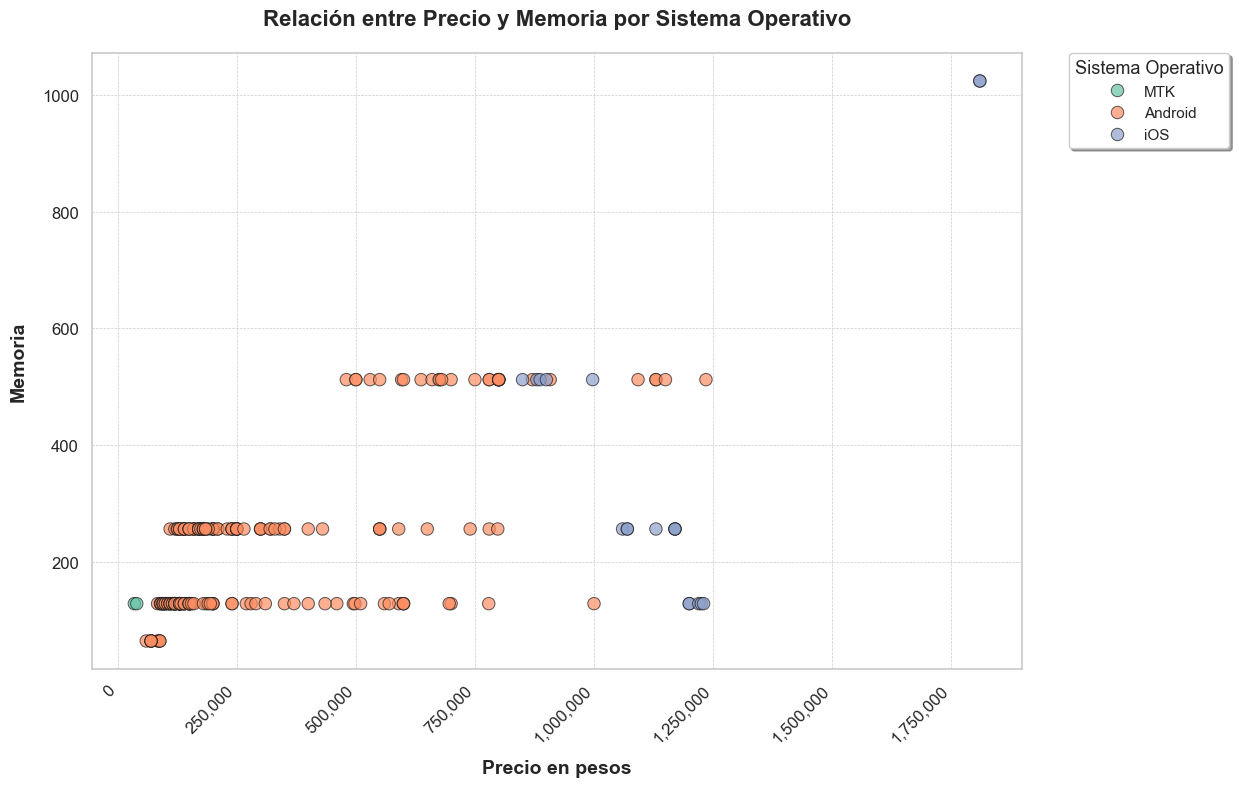

In [7]:
# Establecer estilo y paleta de colores profesional
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x="precio", y="memoria", hue="os_categoria", palette="Set2", s=80, edgecolor="k", alpha=0.7)

# Formato del eje X sin notación científica y con separadores de miles
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Configuración de etiquetas y título
plt.xlabel("Precio en pesos", fontsize=14, labelpad=10, weight='bold')
plt.ylabel("Memoria", fontsize=14, labelpad=10, weight='bold')
plt.title("Relación entre Precio y Memoria por Sistema Operativo", fontsize=16, weight='bold', pad=20)

# Ajuste de la leyenda fuera del gráfico
plt.legend(title="Sistema Operativo", title_fontsize='13', fontsize='11', loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0, frameon=True, shadow=True)

# Rotación y formato de etiquetas del eje X
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir fondo blanco y bordes en el gráfico
plt.gca().set_facecolor("white")
plt.grid(visible=True, linestyle="--", linewidth=0.5)


# Guardar el gráfico en la ruta especificada
plt.savefig("images/precio_memoria.png", bbox_inches="tight", dpi=300)


# Mostrar el gráfico
plt.show()

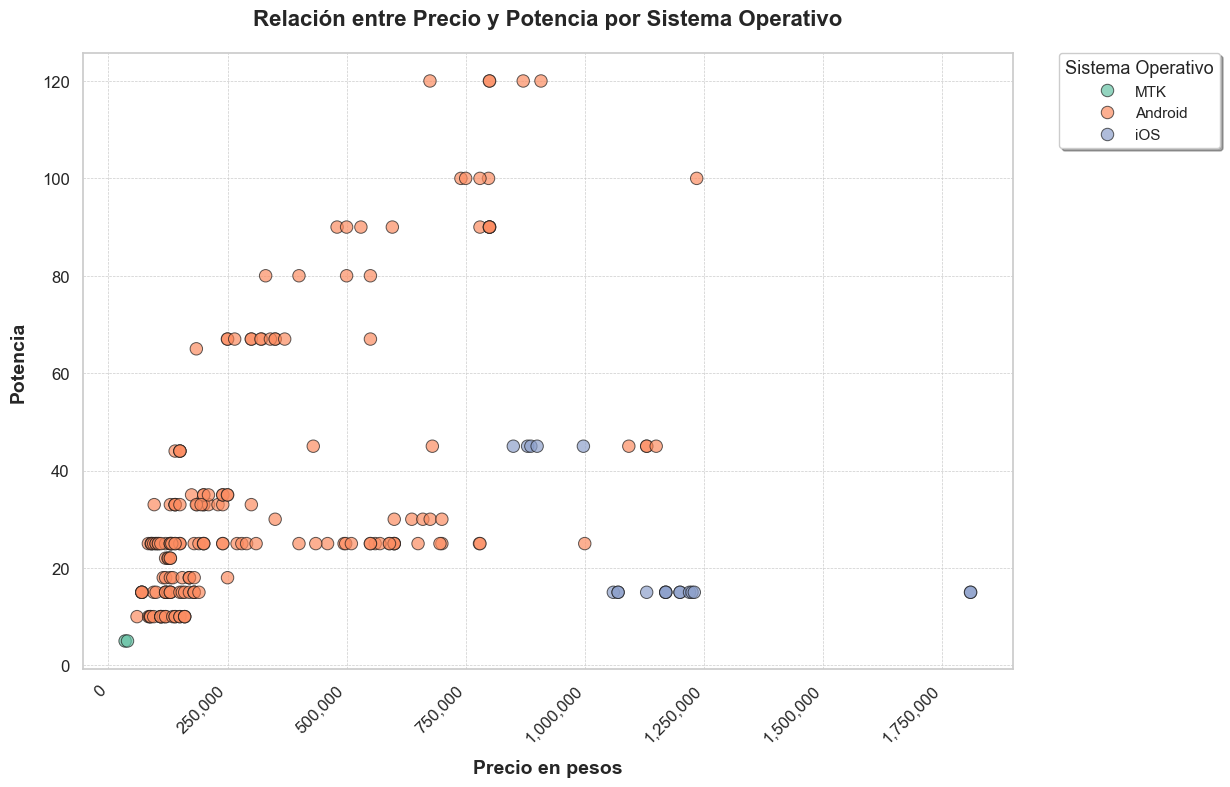

In [8]:
# Establecer estilo y paleta de colores profesional
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x="precio", y="potencia", hue="os_categoria", palette="Set2", s=80, edgecolor="k", alpha=0.7)

# Formato del eje X sin notación científica y con separadores de miles
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Configuración de etiquetas y título
plt.xlabel("Precio en pesos", fontsize=14, labelpad=10, weight='bold')
plt.ylabel("Potencia", fontsize=14, labelpad=10, weight='bold')
plt.title("Relación entre Precio y Potencia por Sistema Operativo", fontsize=16, weight='bold', pad=20)

# Ajuste de la leyenda fuera del gráfico
plt.legend(title="Sistema Operativo", title_fontsize='13', fontsize='11', loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0, frameon=True, shadow=True)

# Rotación y formato de etiquetas del eje X
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir fondo blanco y bordes en el gráfico
plt.gca().set_facecolor("white")
plt.grid(visible=True, linestyle="--", linewidth=0.5)

# Guardar el gráfico en la ruta especificada
plt.savefig("images/precio_potencia.png", bbox_inches="tight", dpi=300)


# Mostrar el gráfico
plt.show()

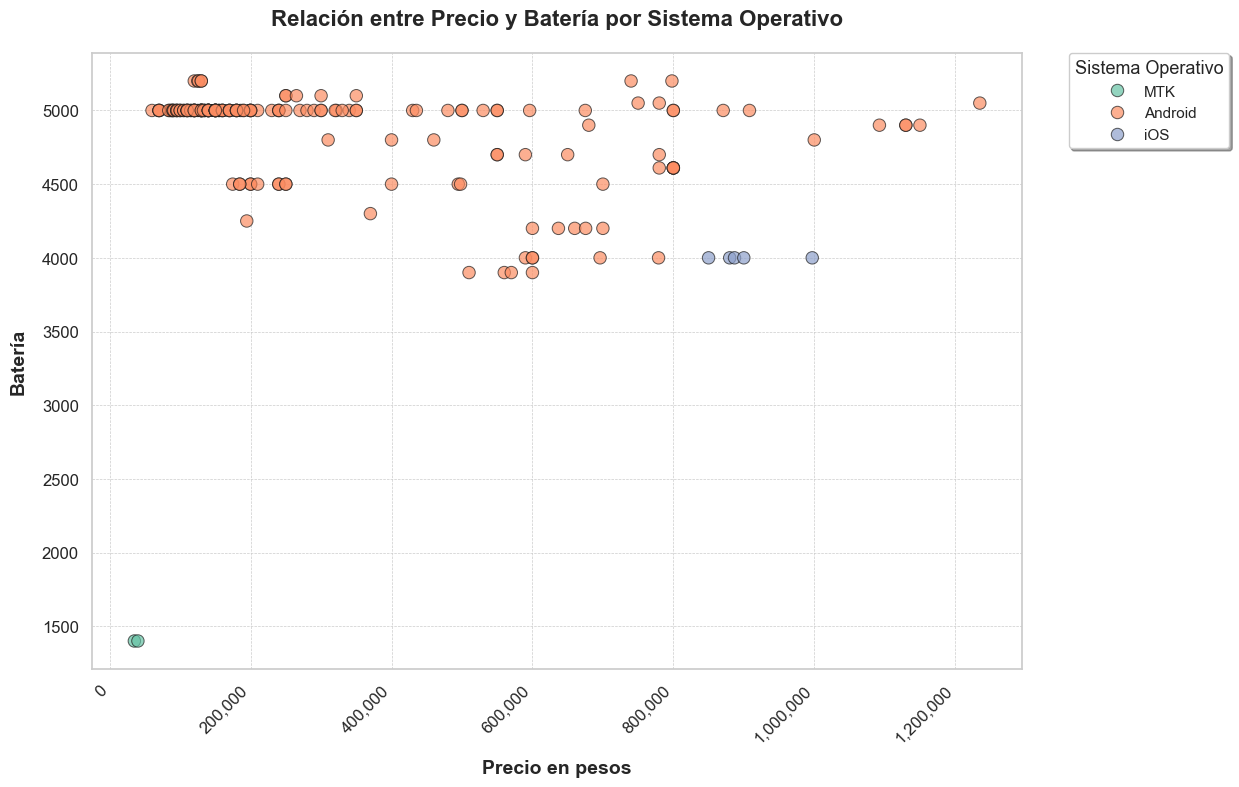

In [9]:
# Establecer estilo y paleta de colores profesional
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x="precio", y="bateria", hue="os_categoria", palette="Set2", s=80, edgecolor="k", alpha=0.7)

# Formato del eje X sin notación científica y con separadores de miles
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Configuración de etiquetas y título
plt.xlabel("Precio en pesos", fontsize=14, labelpad=10, weight='bold')
plt.ylabel("Batería", fontsize=14, labelpad=10, weight='bold')
plt.title("Relación entre Precio y Batería por Sistema Operativo", fontsize=16, weight='bold', pad=20)

# Ajuste de la leyenda fuera del gráfico
plt.legend(title="Sistema Operativo", title_fontsize='13', fontsize='11', loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0, frameon=True, shadow=True)

# Rotación y formato de etiquetas del eje X
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir fondo blanco y bordes en el gráfico
plt.gca().set_facecolor("white")
plt.grid(visible=True, linestyle="--", linewidth=0.5)


# Guardar el gráfico en la ruta especificada
plt.savefig("images/precio_batería.png", bbox_inches="tight", dpi=300)

# Mostrar el gráfico
plt.show()

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Limpieza de columnas
# Limpieza de columnas, asegurándonos de que cada columna sea tratada como string primero
def limpiar_columna(columna):
    data[columna] = data[columna].astype(str)  # Convertir a string
    return pd.to_numeric(data[columna].str.replace(r'\D', '', regex=True), errors='coerce')

data['bateria'] = limpiar_columna('bateria')
data['memoria'] = limpiar_columna('memoria')
data['potencia'] = limpiar_columna('potencia')
data['ram'] = limpiar_columna('ram')

# Eliminar filas con valores NaN resultantes de la conversión
data = data.dropna(subset=['bateria', 'memoria', 'potencia', 'ram', 'precio'])

# Ejemplo de Regresión Lineal
X = data[['bateria', 'memoria', 'potencia', 'ram']]
y = data['precio']

# Crear y ajustar el modelo de regresión lineal
reg = LinearRegression()
reg.fit(X, y)

# Mostrar coeficientes de regresión
print("Coeficientes de regresión lineal:")
for i, col in enumerate(X.columns):
    print(f"{col}: {reg.coef_[i]}")

Coeficientes de regresión lineal:
bateria: -27.871209919072268
memoria: 1211.2699984292994
potencia: 3469.910830521386
ram: -18984.176929496483


/var/folders/hg/s4skq8ks6g1fy2jw2fdkp0840000gn/T/ipykernel_18628/256646986.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columna] = data[columna].astype(str)  # Convertir a string
/var/folders/hg/s4skq8ks6g1fy2jw2fdkp0840000gn/T/ipykernel_18628/256646986.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bateria'] = limpiar_columna('bateria')
/var/folders/hg/s4skq8ks6g1fy2jw2fdkp0840000gn/T/ipykernel_18628/256646986.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [11]:
data['bateria'] = limpiar_columna('bateria')
data['memoria'] = limpiar_columna('memoria')
data['potencia'] = limpiar_columna('potencia')
data['ram'] = limpiar_columna('ram')

# Eliminar filas con valores NaN resultantes de la conversión
data = data.dropna(subset=['bateria', 'memoria', 'potencia', 'ram', 'precio'])

# Definir variables independientes (X) y dependiente (y)
X = data[['bateria', 'memoria', 'potencia', 'ram']]
y = data['precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y ajustar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

# Mostrar importancia de las variables
feature_importances = rf_model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

RMSE: 93792.15029861942
R^2 Score: 0.8666407504048368
bateria: 0.1245
memoria: 0.5274
potencia: 0.1763
ram: 0.1718


/var/folders/hg/s4skq8ks6g1fy2jw2fdkp0840000gn/T/ipykernel_18628/2880772423.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x="Importancia", y="Característica", palette="viridis")


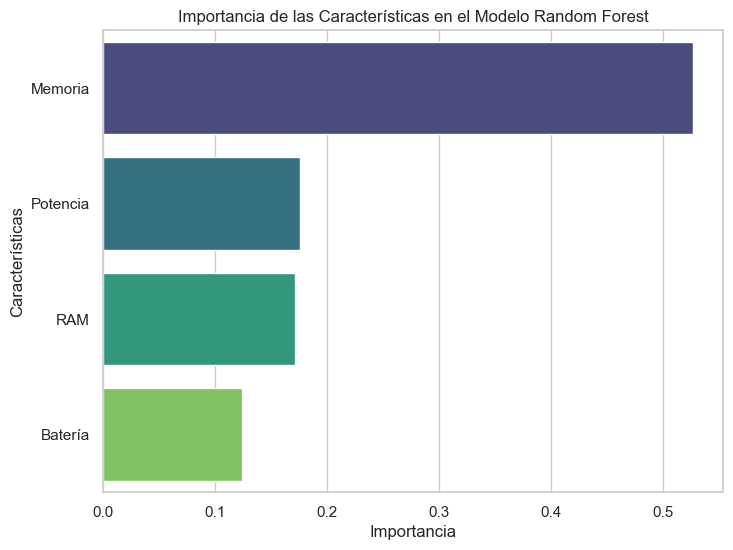

In [12]:
# Asumiendo que ya tienes los valores de importancia en una lista
importances = [0.1245, 0.5274, 0.1763, 0.1718]
features = ["Batería", "Memoria", "Potencia", "RAM"]

# Crear un DataFrame para facilidad de visualización
import pandas as pd
feature_importances = pd.DataFrame({'Característica': features, 'Importancia': importances})

# Ordenar de mayor a menor importancia
feature_importances = feature_importances.sort_values(by="Importancia", ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importances, x="Importancia", y="Característica", palette="viridis")
plt.title("Importancia de las Características en el Modelo Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

/Users/matdknu/.virtualenvs/r-reticulate/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 86040.11927863889
R² Score: 0.8877743407560862


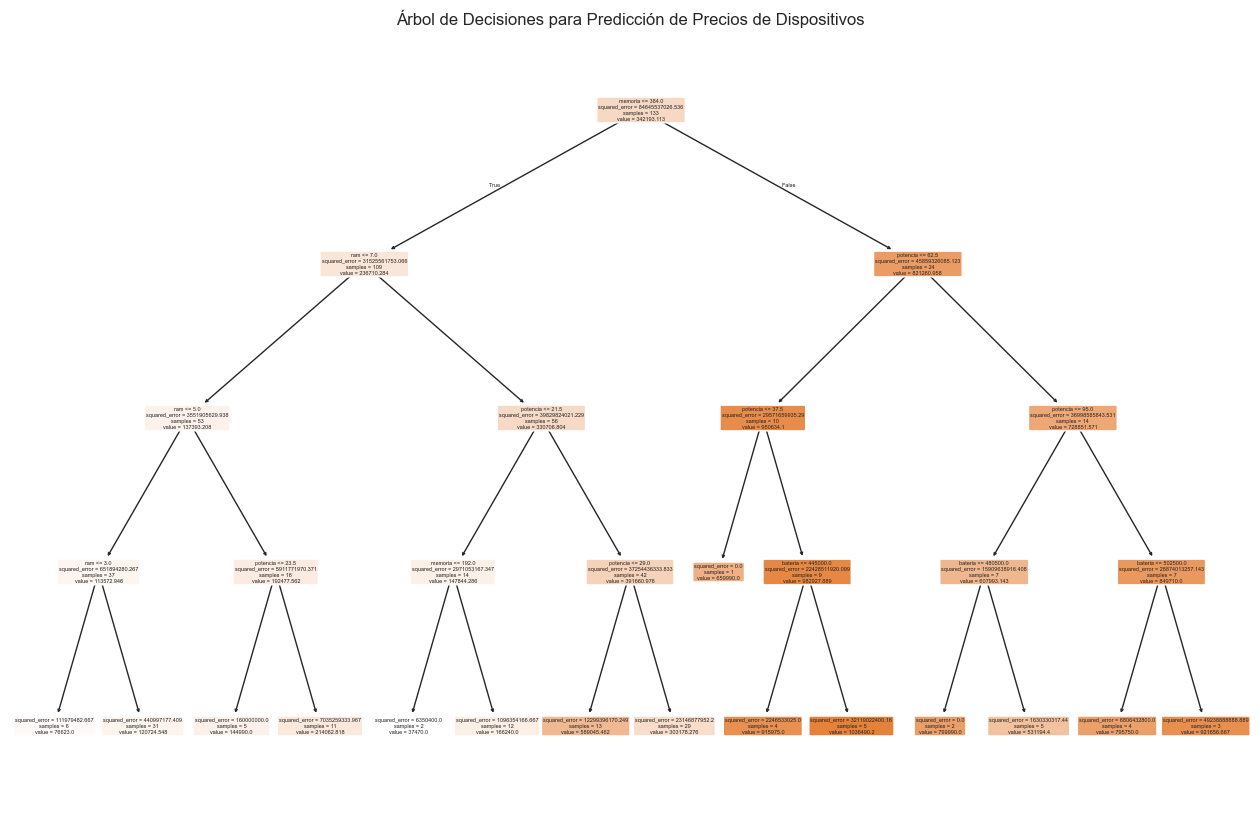

In [13]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Selección de las variables independientes y la variable dependiente
X = data[['bateria', 'memoria', 'potencia', 'ram']]
y = data['precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de árbol de decisiones
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Hacer predicciones y calcular el error
y_pred = tree_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Visualizar el árbol de decisiones
plt.figure(figsize=(16, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Árbol de Decisiones para Predicción de Precios de Dispositivos")
plt.show()


In [14]:
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor

# Entrenamos el modelo si aún no lo has hecho
tree_model = DecisionTreeRegressor(max_depth=5, random_state=0)
tree_model.fit(X, y)  # donde X son tus variables independientes y y es la variable precio

# Exportamos el árbol en formato de texto
tree_rules = export_text(tree_model, feature_names=list(X.columns))

# Imprimimos todas las rutas
print(tree_rules)

|--- memoria <= 384.00
|   |--- bateria <= 490000.00
|   |   |--- potencia <= 29.00
|   |   |   |--- potencia <= 15.00
|   |   |   |   |--- value: [37470.00]
|   |   |   |--- potencia >  15.00
|   |   |   |   |--- bateria <= 475000.00
|   |   |   |   |   |--- value: [606915.35]
|   |   |   |   |--- bateria >  475000.00
|   |   |   |   |   |--- value: [542490.00]
|   |   |--- potencia >  29.00
|   |   |   |--- potencia <= 66.00
|   |   |   |   |--- potencia <= 34.00
|   |   |   |   |   |--- value: [189500.00]
|   |   |   |   |--- potencia >  34.00
|   |   |   |   |   |--- value: [216537.78]
|   |   |   |--- potencia >  66.00
|   |   |   |   |--- memoria <= 192.00
|   |   |   |   |   |--- value: [369990.00]
|   |   |   |   |--- memoria >  192.00
|   |   |   |   |   |--- value: [399990.00]
|   |--- bateria >  490000.00
|   |   |--- potencia <= 44.50
|   |   |   |--- ram <= 5.00
|   |   |   |   |--- memoria <= 96.00
|   |   |   |   |   |--- value: [76452.56]
|   |   |   |   |--- memoria > 

In [15]:
# Definir la función de clasificación
def clasificar_precio(precio):
    if precio < 100000:
        return 'Muy Bajo'
    elif 100000 <= precio < 200000:
        return 'Bajo'
    elif 200000 <= precio < 320000:
        return 'Medio'
    elif 320000 <= precio < 570000:
        return 'Alto'
    else:
        return 'Muy Alto'

# Aplicar la función al DataFrame
data['precio_clasificacion'] = data['precio'].apply(clasificar_precio)

# Ver los resultados
print(data[['precio', 'precio_clasificacion']].head())

   precio precio_clasificacion
0   34950             Muy Bajo
1   39990             Muy Bajo
2   59990             Muy Bajo
3   84317             Muy Bajo
4   86860             Muy Bajo


Accuracy: 0.896551724137931

Classification Report:
               precision    recall  f1-score   support

        alto       1.00      0.95      0.97        20
        bajo       1.00      0.38      0.55         8
       medio       0.83      1.00      0.91        30

    accuracy                           0.90        58
   macro avg       0.94      0.78      0.81        58
weighted avg       0.91      0.90      0.88        58



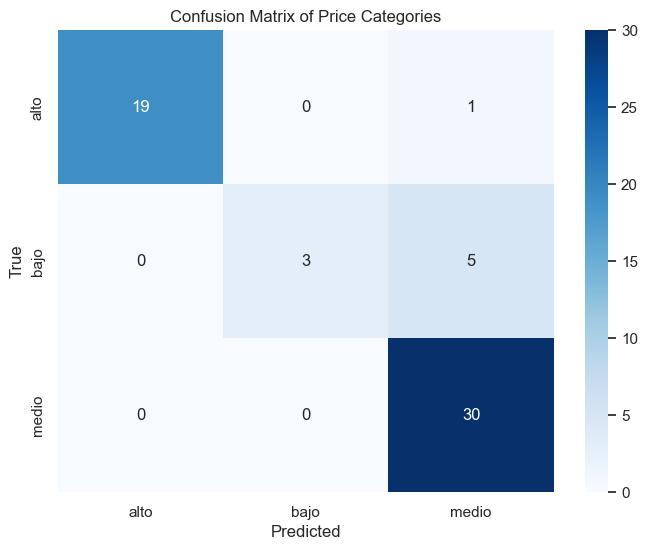

/var/folders/hg/s4skq8ks6g1fy2jw2fdkp0840000gn/T/ipykernel_18628/1478356690.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feature_importance_df, palette="viridis")


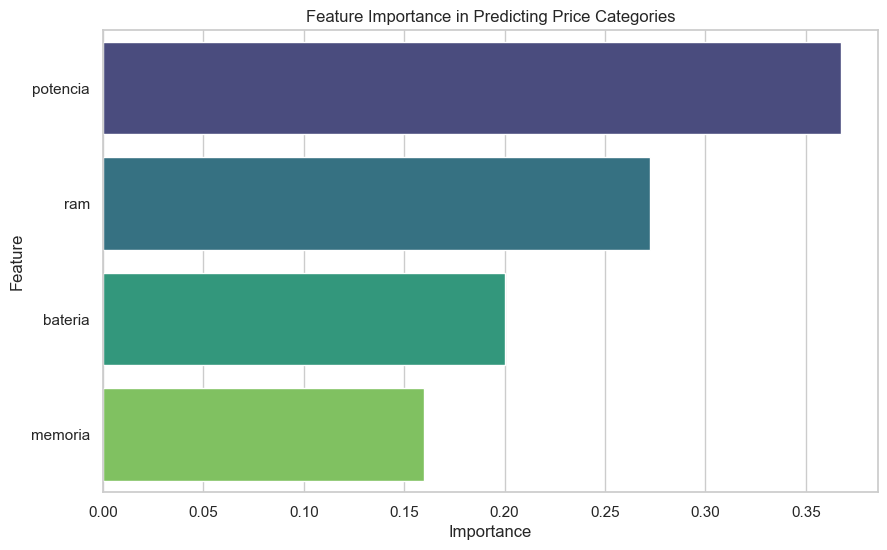

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Asegurarse de que las columnas numéricas estén en el formato correcto
for col in ["bateria", "memoria", "potencia", "ram"]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Eliminar filas con valores faltantes
data = data.dropna(subset=["bateria", "memoria", "potencia", "ram", "precio"])

# Crear categorías de precio (por ejemplo, bajo, medio y alto)
# Ajusta los límites de los precios de acuerdo a tu dataset
data["precio_categoria"] = pd.cut(data["precio"], bins=[0, 100000, 300000, float("inf")], labels=["bajo", "medio", "alto"])

# Separar las características (X) y la variable de destino (y)
X = data[["bateria", "memoria", "potencia", "ram"]]
y = data["precio_categoria"]

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de Random Forest para clasificación
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred = rf_classifier.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix of Price Categories")
plt.show()

# Importancia de características
importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({"feature": X.columns, "importance": importances}).sort_values(by="importance", ascending=False)

# Visualización de la importancia de características
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance in Predicting Price Categories")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()